<a href="https://colab.research.google.com/github/harshdodiwan/feynn-labs/blob/main/EV_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Required Libraries


In [ ]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reading the Datasets

In [ ]:

# fetching dataset - 1
df1 = pd.read_csv('Ev Charging (State Wise).csv')
df1.head()

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [ ]:
# fetching dataset - 2
df2 = pd.read_excel('ev market india.xlsx')
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
# fetching dataset - 3
df3 = pd.read_csv('Vehicle Type.csv')
df3.head()

,Sl. No.,Vehicle Category,2018 - Total,2018 - EV,2018 - %,2019 - Total,2019 - EV,2019 - %,2020 - Total,2020 - EV,2020 - %,2021 - Total,2021 - EV,2021 - %,2022 - Total,2022 - EV,2022 - %,2023 (Till 01-08-2023) - Total,2023 (Till 01-08-2023) - EV,2023 (Till 01-08-2023) - %
0,1,Two Wheeler,19576235,17067,0.09,18644700,30389,0.16,14305129,29113,0.20,13926217,156243,1.12,15592118,631181,4.05,9276337,489637,5.28
1,2,Three Wheeler,764806,110133,14.40,765867,133489,17.43,400893,90385,22.55,390820,158129,40.46,677034,350247,51.73,572654,300114,52.41
2,3,Four Wheeler,2999288,1047,0.03,2822782,962,0.03,2396428,3207,0.13,2945340,12259,0.42,3346973,33205,0.99,2020459,40186,1.99
3,4,Goods Vehicles,886047,658,0.07,799661,54,0.01,503358,15,0.00,602805,1118,0.19,804409,653,0.08,490920,1512,0.31
4,5,Public Service Vehicle,79317,50,0.06,81022,508,0.63,40328,88,0.22,15434,1177,7.63,45448,1972,4.34,47058,985,2.09


# Exploratory Data Analysis (EDA)


**Data Analyizing**

In [ ]:

# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)

DF1 Shape:  (26, 2)
DF2 Shape:  (103, 14)
DF3 Shape:  (5, 20)


In [ ]:

# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())
print(' <<< DATASET 3 -----------------------------------------------------------')
print(df3.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State/UT                       26 non-null     object
 1   No. of EV Chargers Sanctioned  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103

In [ ]:

# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2,'<<< DATASET 2 >>>', d3)

'<<< DATASET 1 >>>'

,No. of EV Chargers Sanctioned
count,26.000000
mean,221.307692
std,551.474806
min,10.000000
25%,25.000000
50%,71.000000
75%,210.000000
max,2877.000000


'<<< DATASET 2 >>>'

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


'<<< DATASET 2 >>>'

,Sl. No.,2018 - Total,2018 - EV,2018 - %,2019 - Total,2019 - EV,2019 - %,2020 - Total,2020 - EV,2020 - %,2021 - Total,2021 - EV,2021 - %,2022 - Total,2022 - EV,2022 - %,2023 (Till 01-08-2023) - Total,2023 (Till 01-08-2023) - EV,2023 (Till 01-08-2023) - %
count,5.000000,5.000000e+00,5.00000,5.000000,5.000000e+00,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000e+00,5.000000,5.00000,5.000000e+00,5.000000,5.000000
mean,3.000000,4.861139e+06,25791.00000,2.930000,4.622806e+06,33080.400000,3.652000,3.529227e+06,24561.600000,4.620000,3.576123e+06,65785.200000,9.964000,4.093196e+06,203451.600000,12.23800,2.481486e+06,166486.800000,12.416000
std,1.581139,8.298308e+06,47687.03557,6.411961,7.905280e+06,57603.008917,7.706213,6.093400e+06,38765.148133,10.023545,5.898890e+06,83563.017132,17.322593,6.550813e+06,280716.287057,22.15499,3.870238e+06,219568.726632,22.429476
min,1.000000,7.931700e+04,50.00000,0.030000,8.102200e+04,54.000000,0.010000,4.032800e+04,15.000000,0.000000,1.543400e+04,1118.000000,0.190000,4.544800e+04,653.000000,0.08000,4.705800e+04,985.000000,0.310000
25%,2.000000,7.648060e+05,658.00000,0.060000,7.658670e+05,508.000000,0.030000,4.008930e+05,88.000000,0.130000,3.908200e+05,1177.000000,0.420000,6.770340e+05,1972.000000,0.99000,4.909200e+05,1512.000000,1.990000
50%,3.000000,8.860470e+05,1047.00000,0.070000,7.996610e+05,962.000000,0.160000,5.033580e+05,3207.000000,0.200000,6.028050e+05,12259.000000,1.120000,8.044090e+05,33205.000000,4.05000,5.726540e+05,40186.000000,2.090000
75%,4.000000,2.999288e+06,17067.00000,0.090000,2.822782e+06,30389.000000,0.630000,2.396428e+06,29113.000000,0.220000,2.945340e+06,156243.000000,7.630000,3.346973e+06,350247.000000,4.34000,2.020459e+06,300114.000000,5.280000
max,5.000000,1.957624e+07,110133.00000,14.400000,1.864470e+07,133489.000000,17.430000,1.430513e+07,90385.000000,22.550000,1.392622e+07,158129.000000,40.460000,1.559212e+07,631181.000000,51.73000,9.276337e+06,489637.000000,52.410000


In [ ]:
df1

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


# Analysis of First Dataset

**Observation: Understanding the State wise dataset to gain the info about in which state highest. And Maharastra, Andhra Pradhesh , Tamil Nadu , Gujarat are the top four cities among all.**

<ipython-input-10-efbe23bf892d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df1, x='No. of EV Chargers Sanctioned', y='State/UT', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


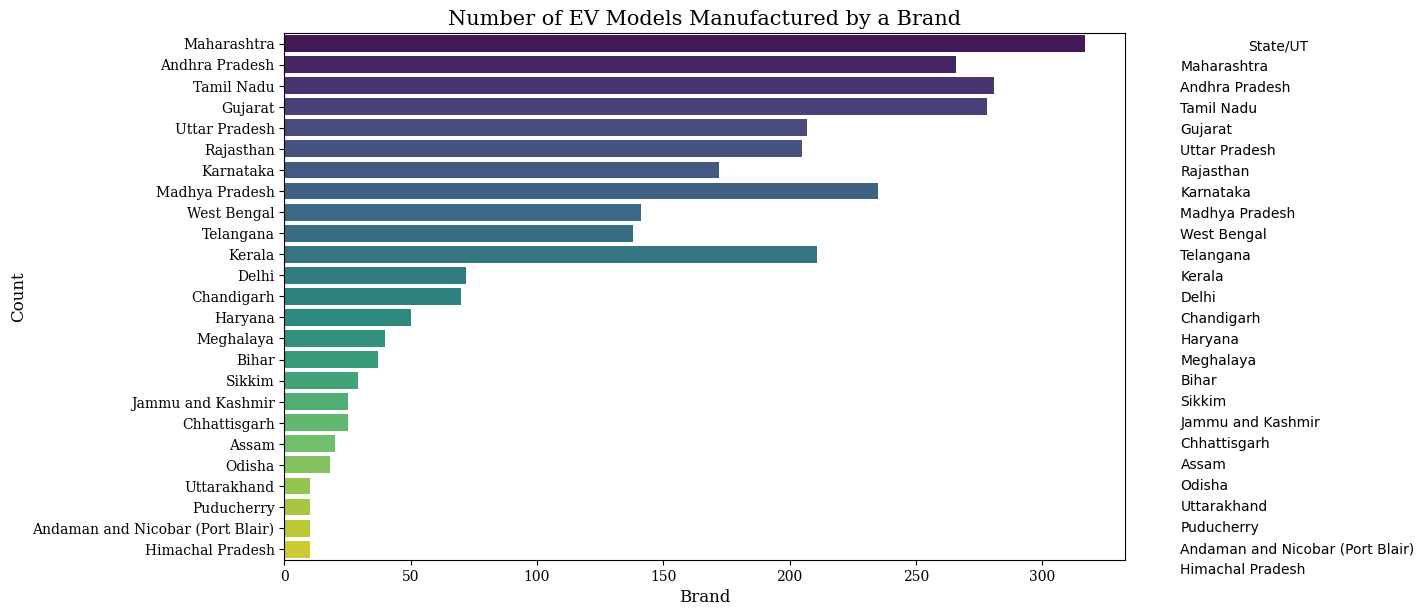

In [ ]:
# State wise data visualization from dataset1
df1 = df1[df1 != 'Total'].dropna(how='all') # Dropping the total to understand the real analysis of every state data
sns.catplot(data=df1, x='No. of EV Chargers Sanctioned', y='State/UT', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

In [ ]:
df2

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


# Analysis of EV Models Manufactured by Brand

**Observation:  Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.**

<ipython-input-17-be94f5eca860>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df2, x='Brand', kind='count', palette='viridis', height=6, aspect=2)


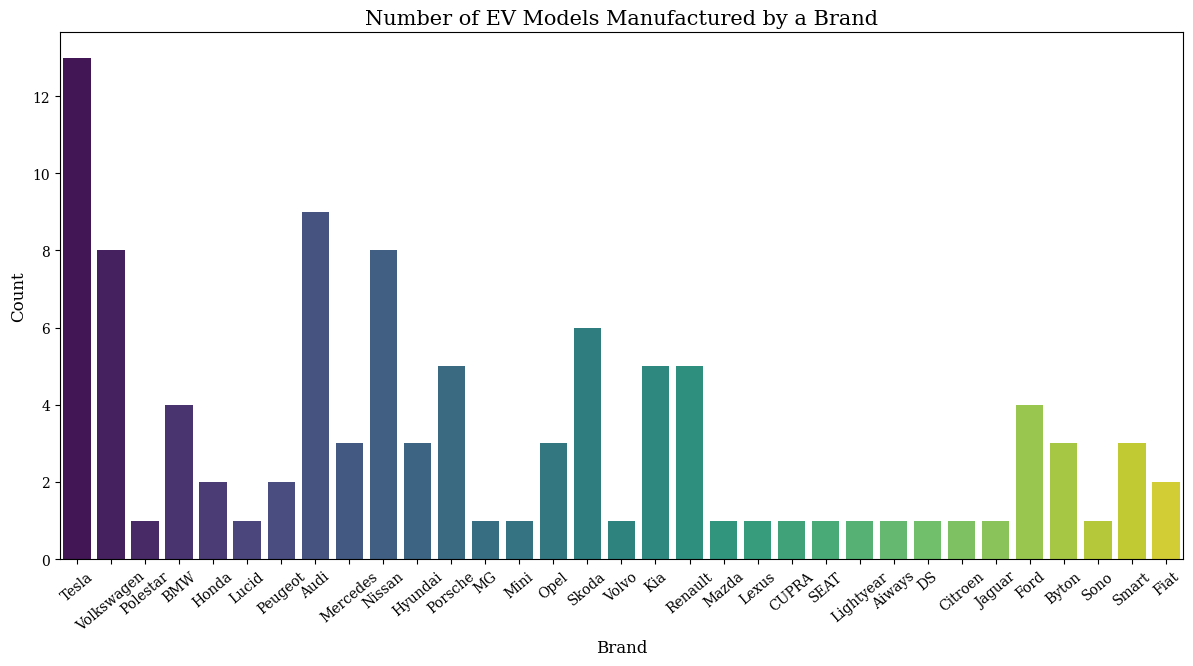

In [ ]:
# Analysis of Brands and their models
sns.catplot(data=df2, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

# Analysis of EV Vehicles by their BodyStyle

**Observation: SUV And HatchBack, Sedan are the highest body types in market**

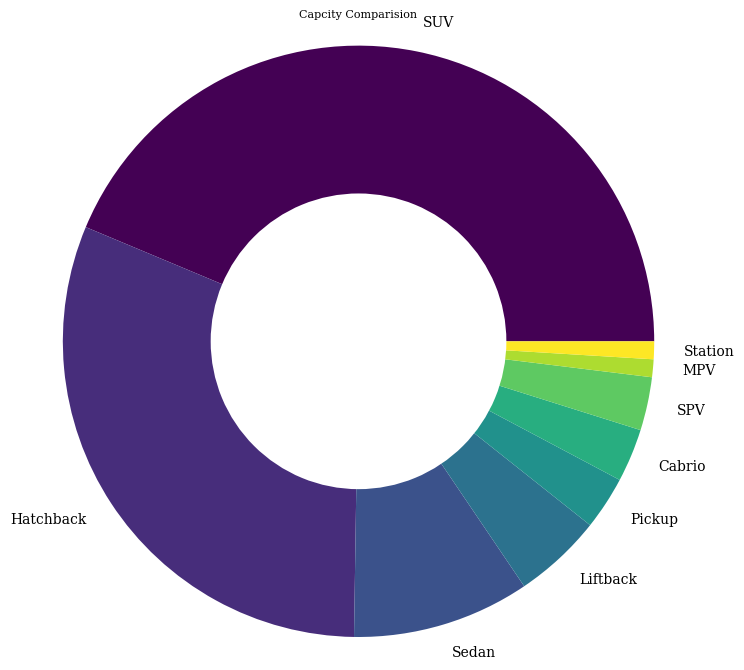

In [ ]:
# creating the pieplot for dataset2 using their respective bodystyle
x = df2['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif',size = 10))
plt.pie(x=[1], radius=1, colors='white')
plt.title(label='Capcity Comparision', family='serif', size=8, pad=100)
plt.ylabel('')
plt.show()


# Analysis of Different Segments of EV vehicles

**Observation: B and C, D body segments form the majority while S and A the minority**

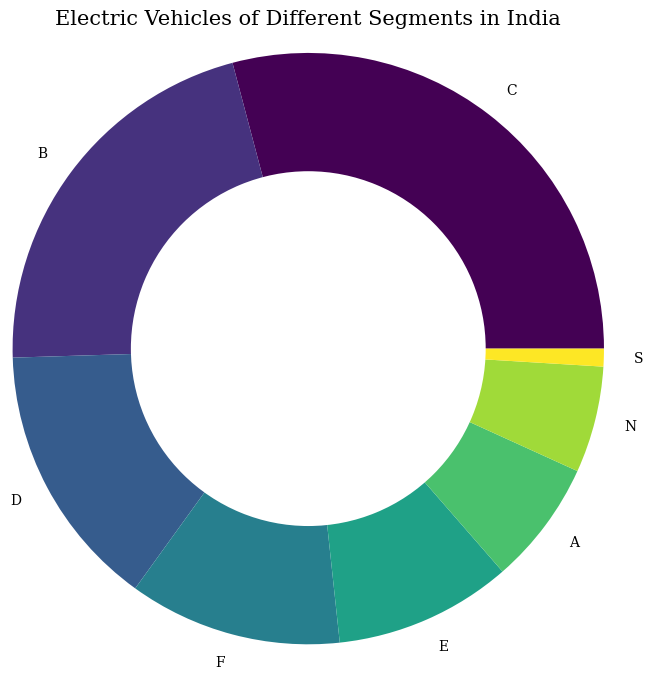

In [ ]:
# Creating Pieplot for Data Visualization of the Different Segments in Dataset2
x = df2['Segment'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

In [ ]:
df2

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,1.16 Cr,5 Seater,na,na,na


# Analysis of EVs of different number of seats

**Observation: EVs with 5 sitters dominate the market while EVs with 2 sitters are less in number.**

<ipython-input-27-57b591e0e29e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Seats', palette='viridis')


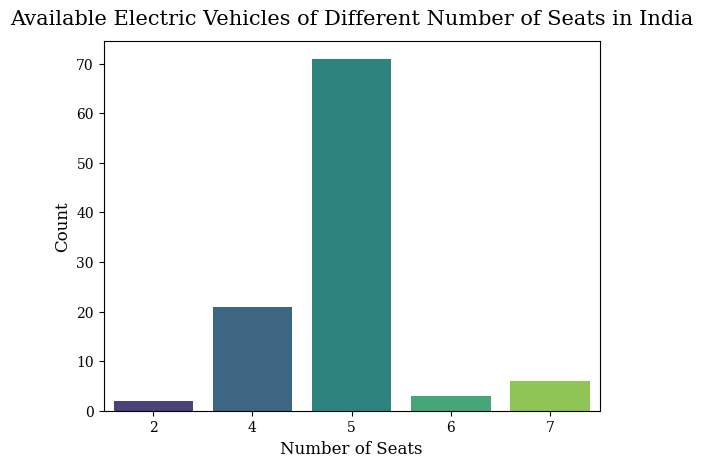

In [ ]:
# creating a countplot for EVs of different number of seats from dataset 3
sns.countplot(data=df2, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

# Analysis Vehicle Type in 2018 Total

**Observation: Two Wheeler has the highest Sales
 in 2018**

<ipython-input-48-d0f58ac84ada>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2018 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


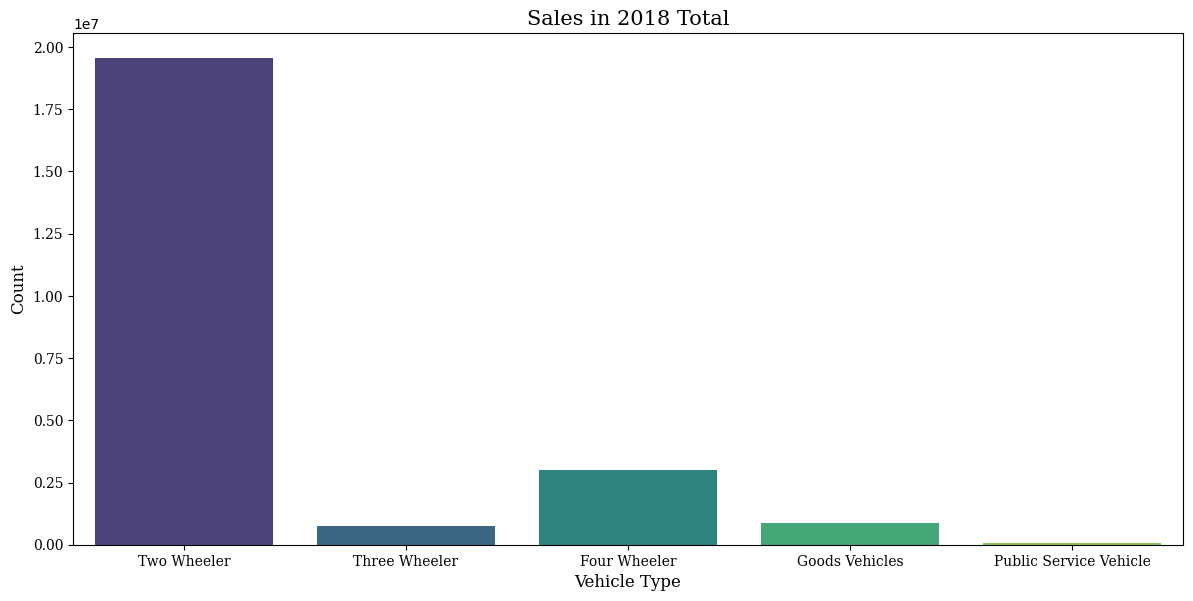

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2018 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Vehicle Type',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2018 Total', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2018 EV Segment

**Observation: Three Wheeler has the highest sales in 2018 EV Type**

<ipython-input-62-2d339c36a26b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2018 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


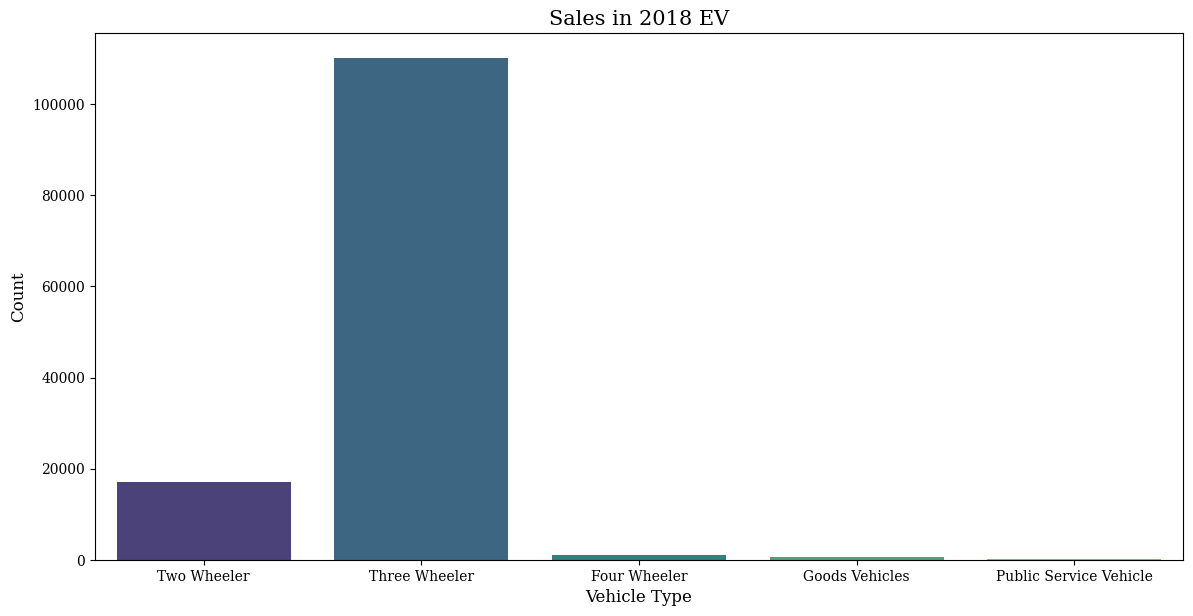

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2018 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Vehicle Type',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2018 EV', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2019 Segment

**Observation: Two Wheeler has the highest sales in 2019.**

<ipython-input-28-24971149cf67>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2019 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


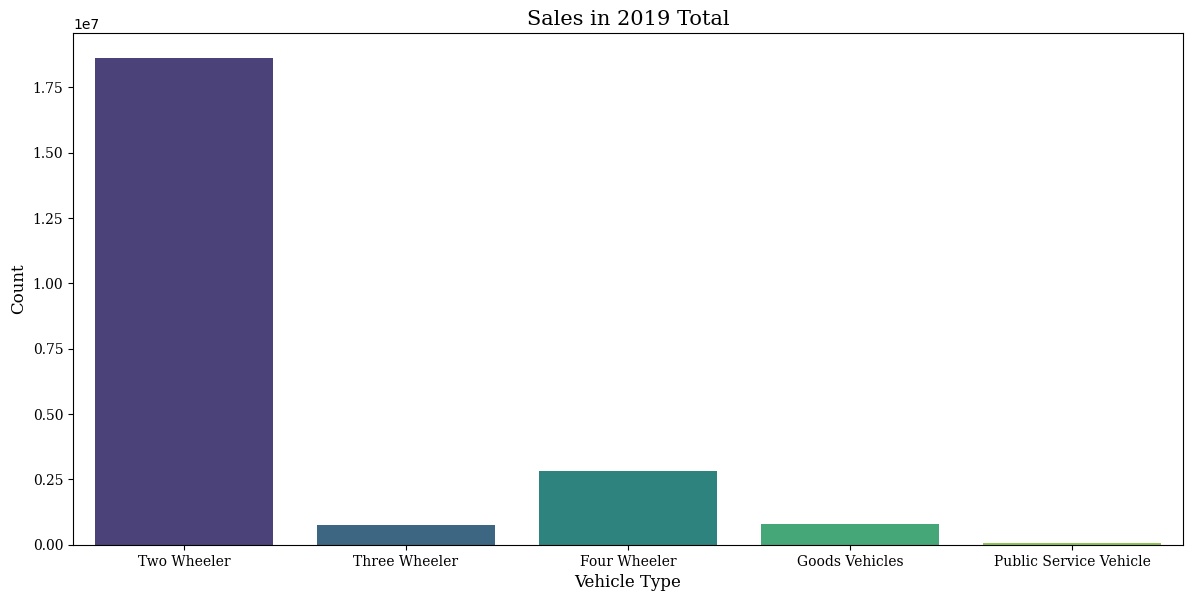

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2019 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Vehicle Type',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2019 Total', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2019 EV  Market Segment

**Observation: Three Wheeler has the highest sales in 2019 EV Type**

<ipython-input-65-e0fa8bb6356c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2019 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


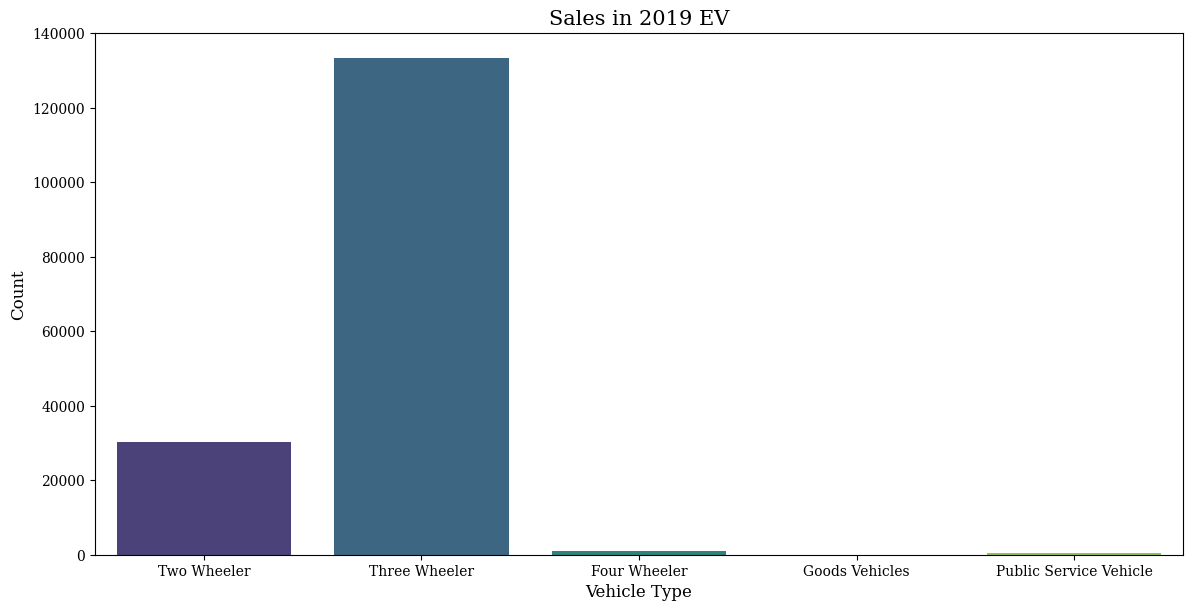

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2019 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Vehicle Type',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2019 EV', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2020 Market Segment

**Observation: Two Wheeler, Four Wheeler has the highest sales in 2020.**

<ipython-input-30-00e9c9fc7577>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2020 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


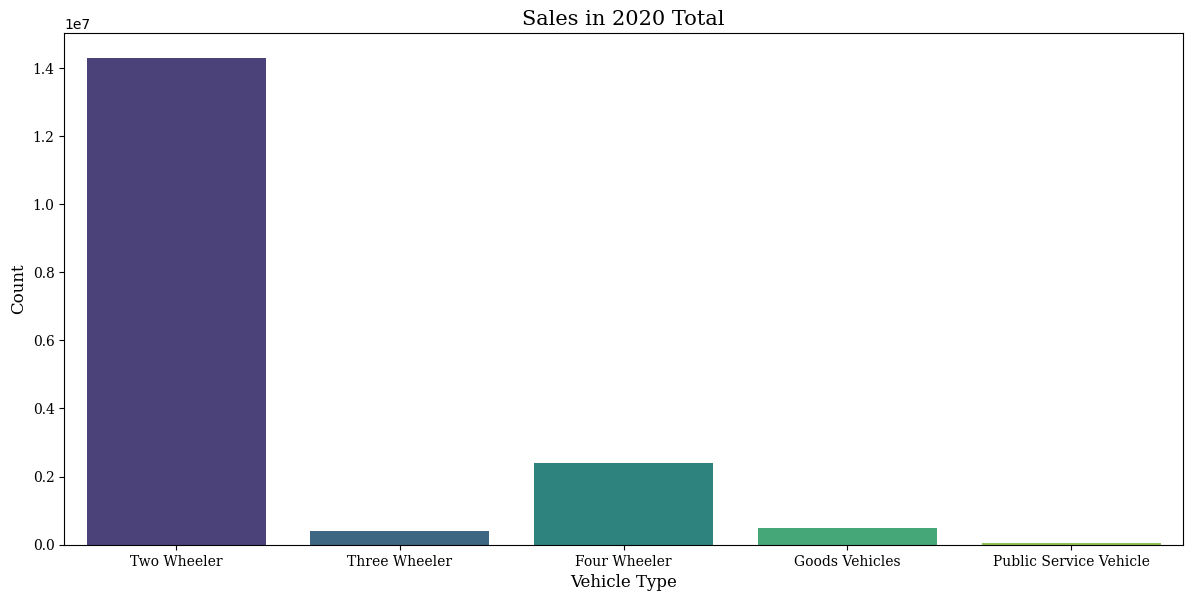

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2020 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Vehicle Type',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2020 Total', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2020 EV Market Segment

**Observation: Two Wheeler ,Three Wheeler has the highest sales in 2020 EV Type**

# Analysis of Vehicle Type in 2020 EV Market Segment

**Observation: Two Wheeler, Three Wheeler has the highest sales in 2020 EV Type**

<ipython-input-32-a0d9e66fa9dc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2020 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


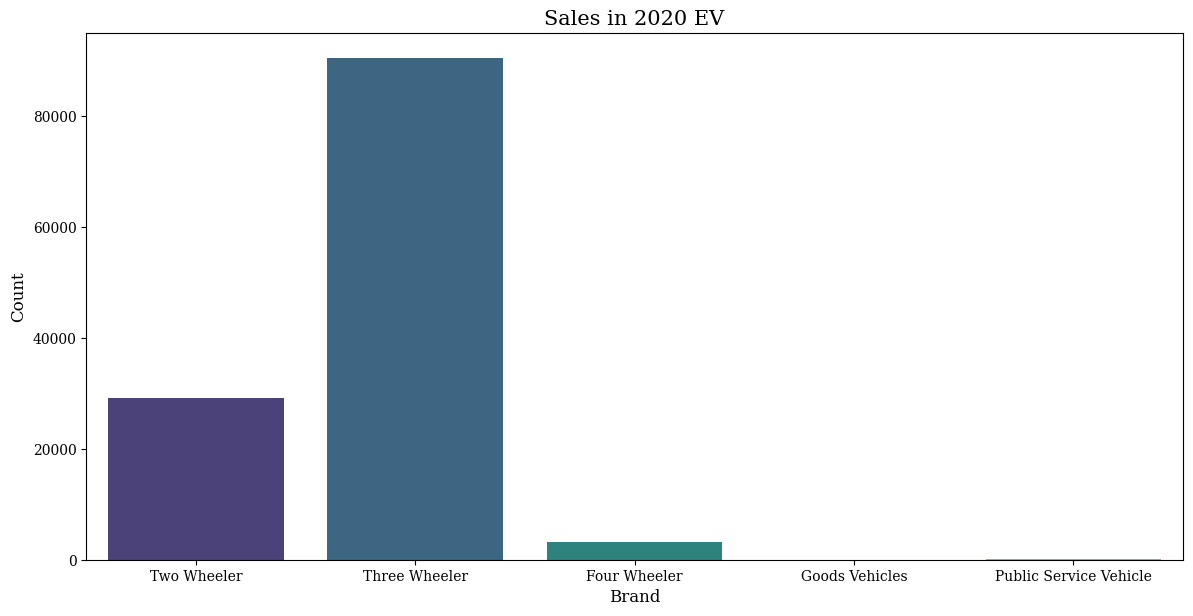

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2020 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2020 EV', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2021 Market Segment

**Observation: Four Wheeler, Two Wheeler has the highest sales in 2021.**

<ipython-input-33-6939ef19d0ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2021 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


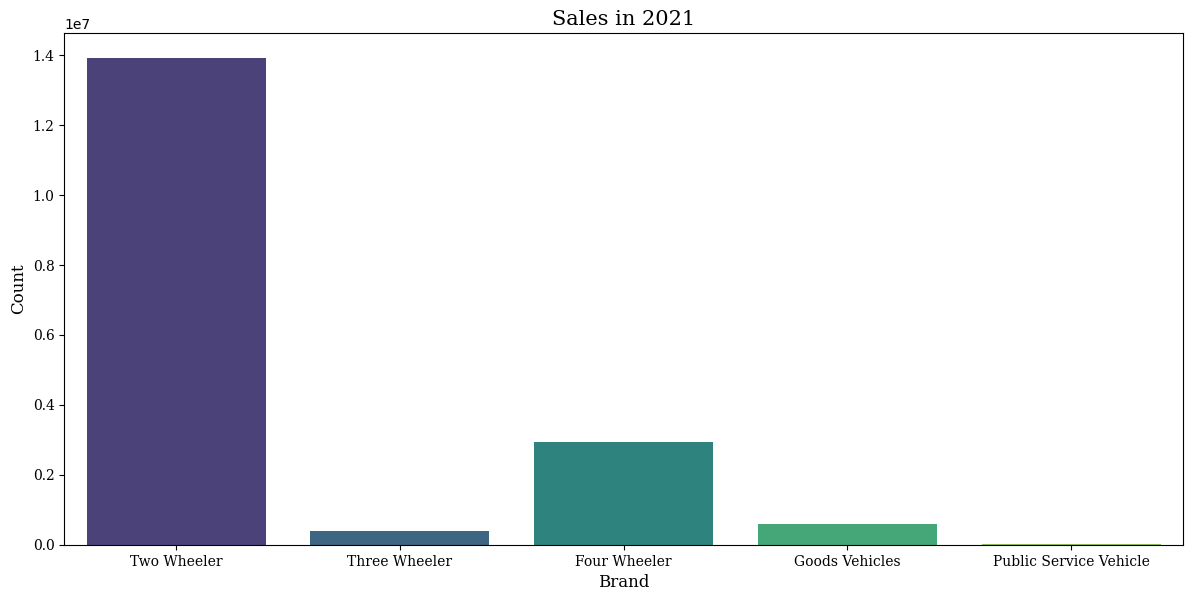

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2021 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2021 Total', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2021 EV Market Segment

**Observation: Two Wheeler,Three Wheeler has the highest sales in 2021 EV Type**

<ipython-input-34-fc166f386019>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2021 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


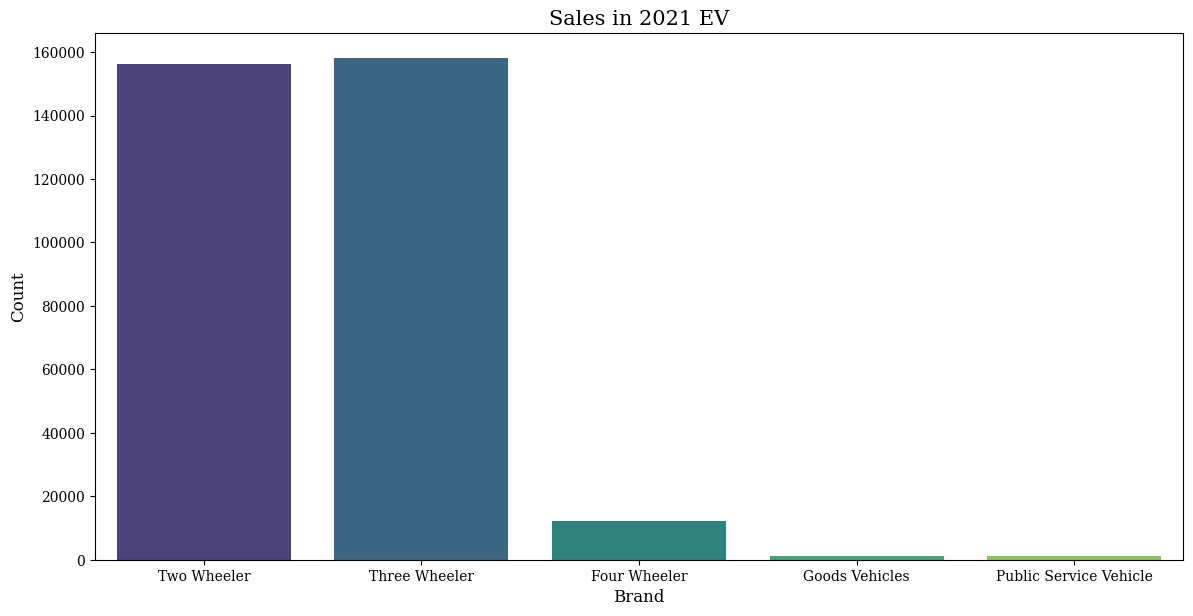

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2021 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2021 EV', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2022 Market Segment

**Observation: Two Wheeler, Four Wheeler has the highest sales in 2022.**

<ipython-input-35-5c02af30ce20>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2022 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


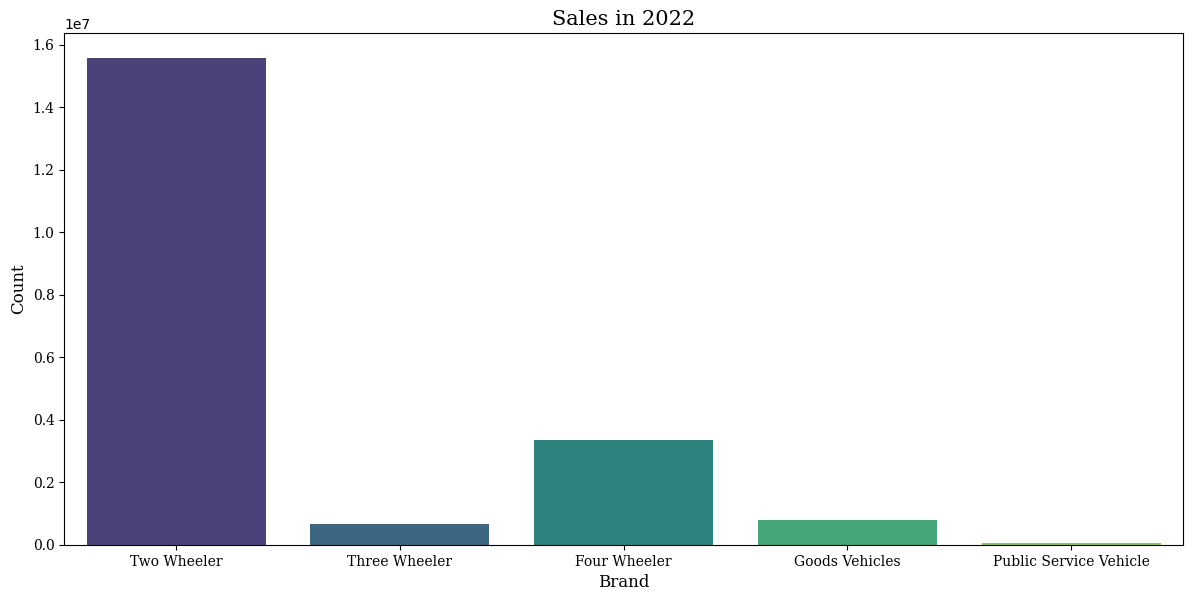

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2022 - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2022 Total ', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2022 EV Market Segment

**Observation: Two Wheeler, Three Wheeler and Four Wheeler has the highest sales in 2022 EV Type**

<ipython-input-37-a977797d5d41>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2022 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


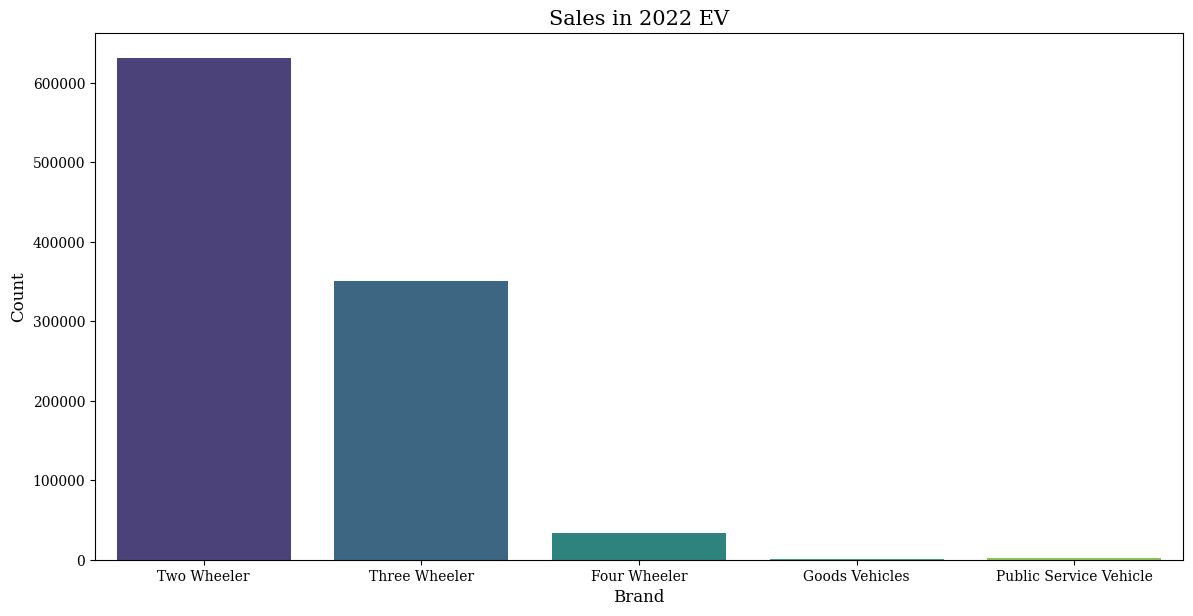

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2022 - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2022 EV', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2023 Market Segment

**Observation: Two Wheeler, Four Wheeler has the highest sales in 2023.**

<ipython-input-38-3cdb0f343838>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2023 (Till 01-08-2023) - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


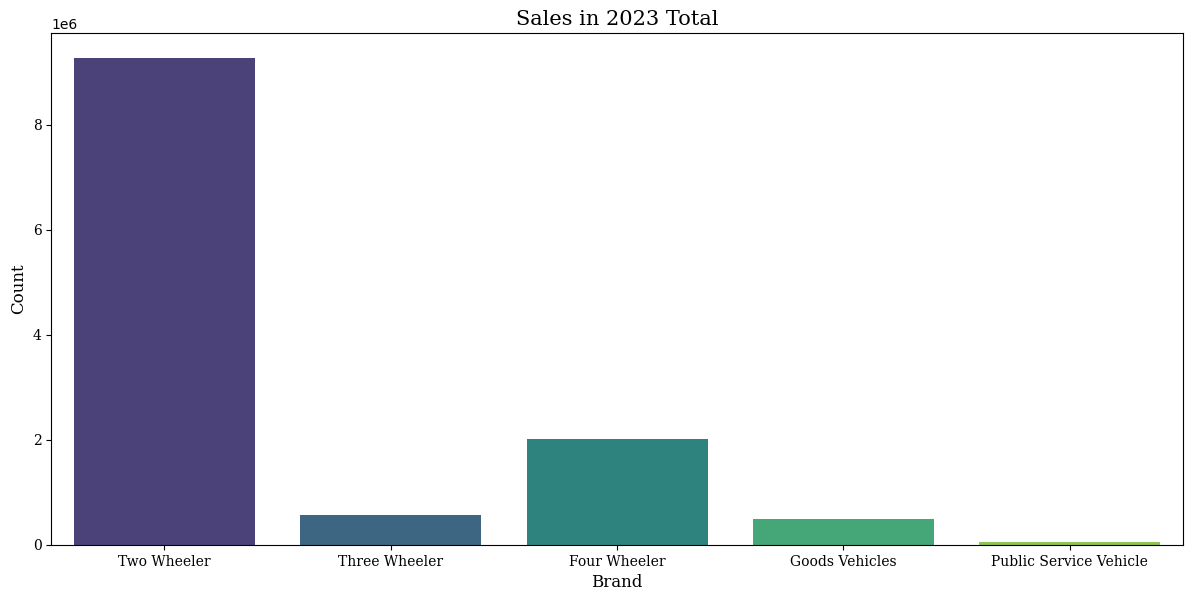

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2023 (Till 01-08-2023) - Total', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2023 Total', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type in 2023 EV Market Segment

**Observation: Two Wheeler,Three Wheeler and Four Wheeler has the highest sales in 2023 EV Type**

<ipython-input-40-8686a740fc9e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='Vehicle Category', y='2023 (Till 01-08-2023) - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter


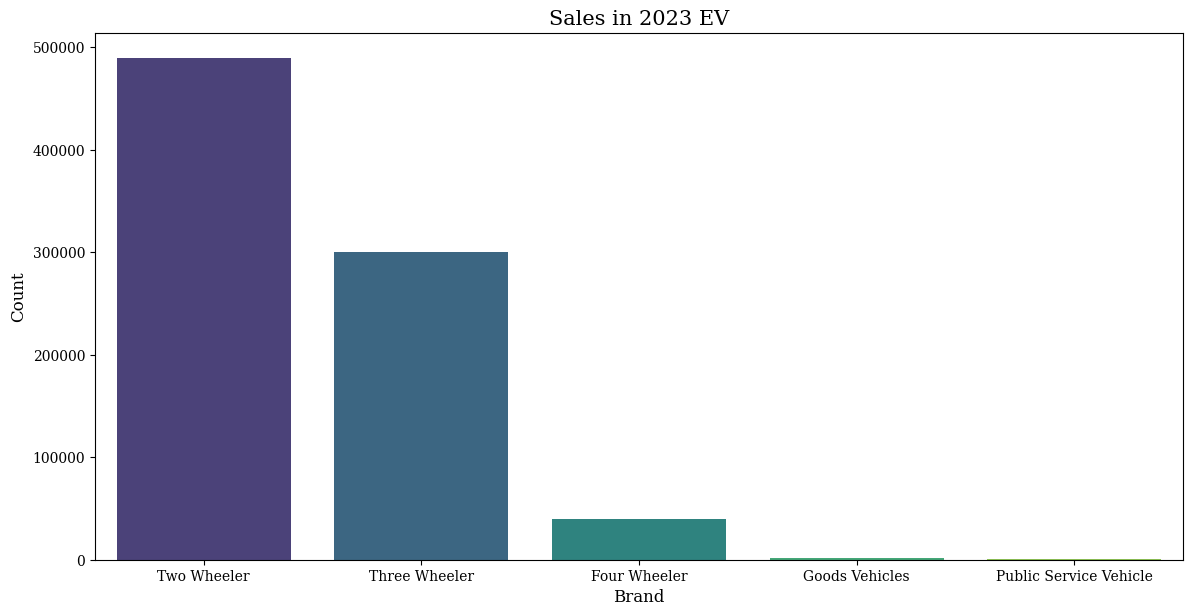

In [ ]:
# creating a barplot for Vehicle Type of different number of Sales from dataset 3
sns.catplot(data=df3, x='Vehicle Category', y='2023 (Till 01-08-2023) - EV', kind='bar', palette='viridis', height=6, aspect=2) # Changed kind to 'bar' and added 'y' parameter
sns.despine(right=False, top=False)
plt.tick_params(axis='x')
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Sales in 2023 EV', family='serif', size=15)
plt.show()

# Analysis of Vehicle Type

**Observation: Ev Vehicles are gaining the slow and steady growth of increasing of sales by every year.**

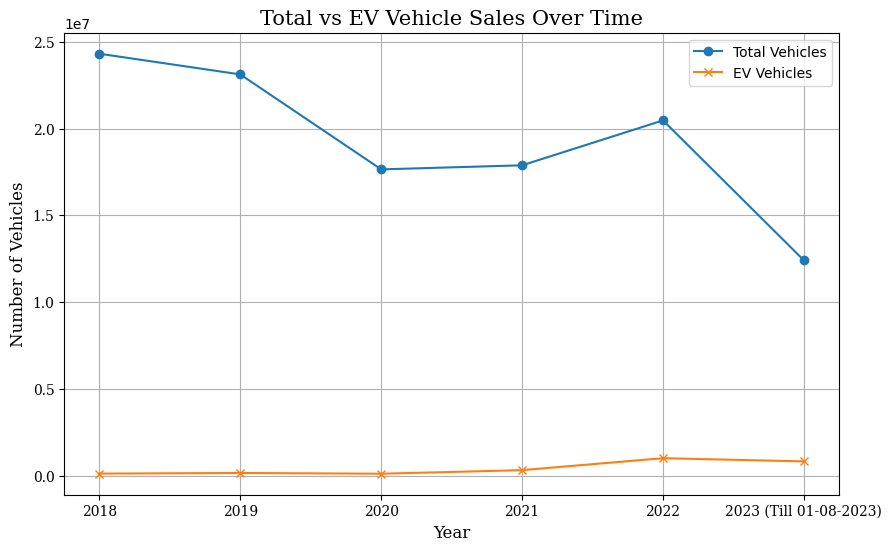

In [ ]:
# creating a LineChart from Analysing the Dataset 3
years = ['2018', '2019', '2020', '2021', '2022', '2023 (Till 01-08-2023)']
total_values = [df3[f'{year} - Total'].sum() for year in years]
ev_values = [df3[f'{year} - EV'].sum() for year in years]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(years, total_values, label='Total Vehicles', marker='o')
plt.plot(years, ev_values, label='EV Vehicles', marker='x')

# Set labels and title
plt.xlabel('Year', family='serif', size=12)
plt.ylabel('Number of Vehicles', family='serif', size=12)
plt.title('Total vs EV Vehicle Sales Over Time', family='serif', size=15)
plt.xticks(years, family='serif')
plt.yticks(family='serif')
plt.legend()
plt.grid(True)
plt.show()


# Analysis of Vehicle Type from Dataset 3

**Observation: Four Wheeler and Two Wheeler has the highest sales in Every year compared to other type vehicles.**

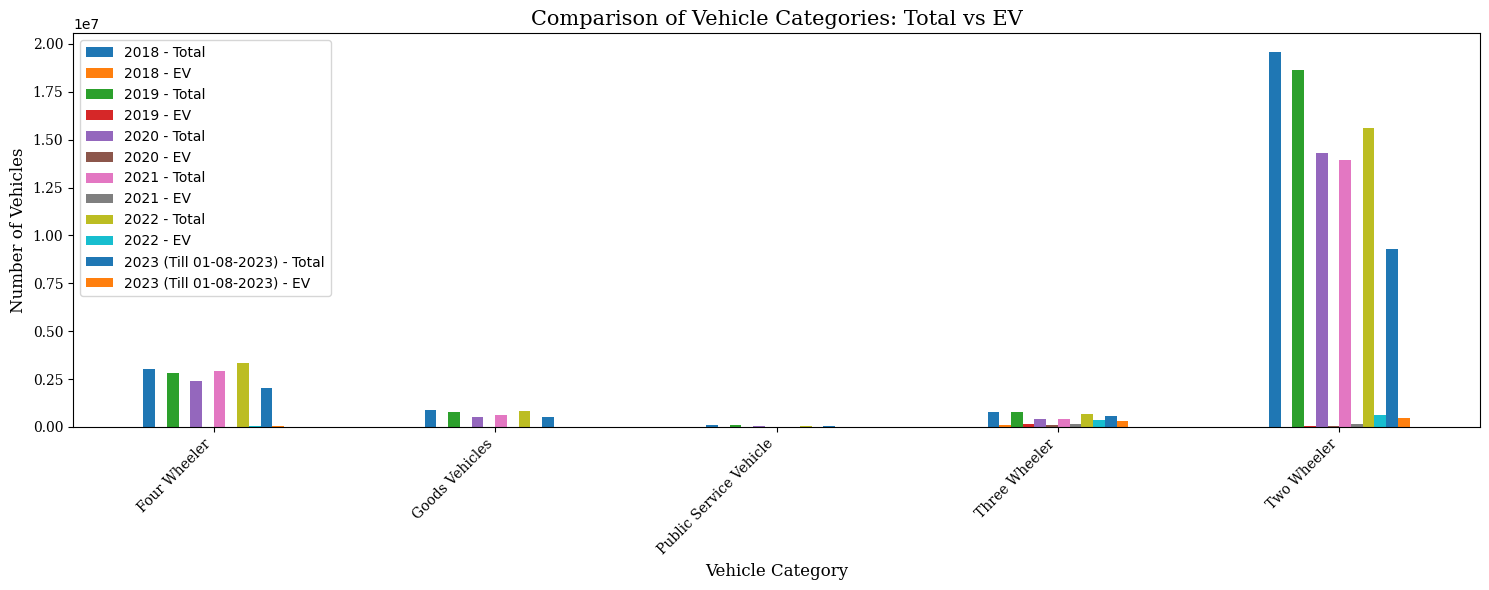

In [ ]:
# creating a barplot for Comparison of total vehicles and ev vehicle from dataset 3
category_totals = df3.groupby('Vehicle Category')[['2018 - Total', '2018 - EV', '2019 - Total', '2019 - EV',
                                                '2020 - Total', '2020 - EV', '2021 - Total', '2021 - EV',
                                                '2022 - Total', '2022 - EV', '2023 (Till 01-08-2023) - Total',
                                                '2023 (Till 01-08-2023) - EV']].sum()

# Plot the bar chart
category_totals.plot(kind='bar', figsize=(15, 6))
plt.title('Comparison of Vehicle Categories: Total vs EV', family='serif', size=15)
plt.xlabel('Vehicle Category', family='serif', size=12)
plt.ylabel('Number of Vehicles', family='serif', size=12)
plt.xticks(rotation=45, ha='right', family='serif')
plt.yticks(family='serif')
plt.tight_layout()
plt.show()


# Analysis of the number of seats by each brand
**Observation: Based on the number of seats, Tesla, Mercedes and Nissan have the maximum number of seats and Smart the minimum**

<ipython-input-53-e34b145c0030>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', data=df2, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
<ipython-input-53-e34b145c0030>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df2, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)


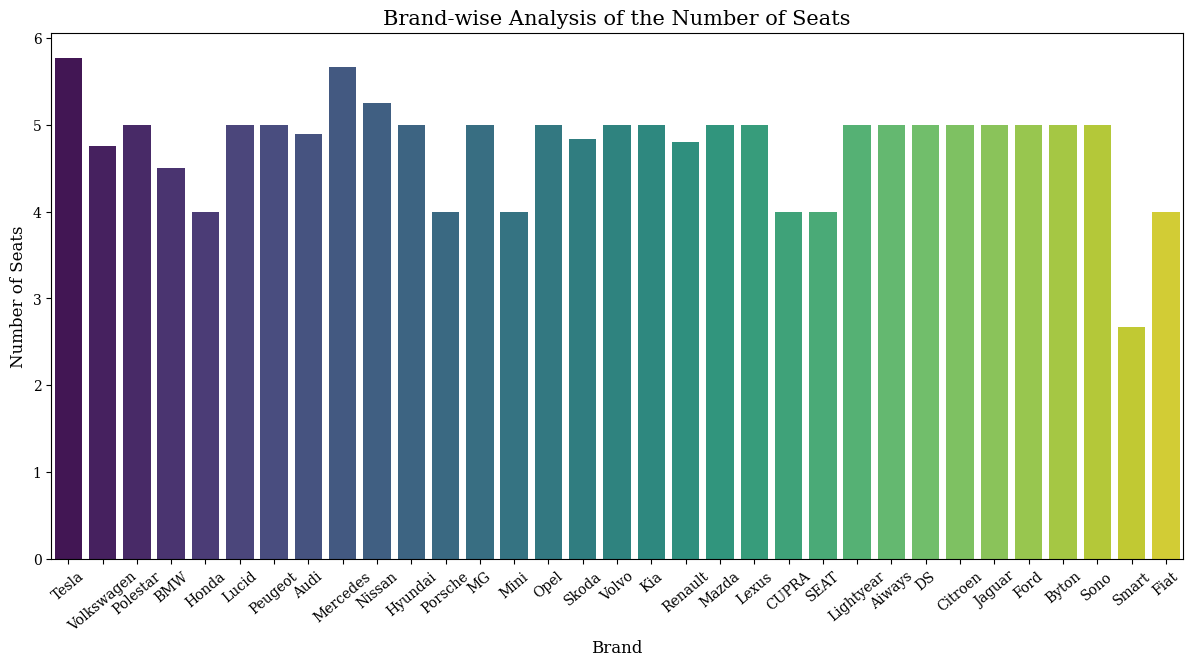

In [ ]:

# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=df2, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);


# Analysis of different plug types
**Observation: EVs with plus type of 'Type 2 CCS' seem to dominate the market.**

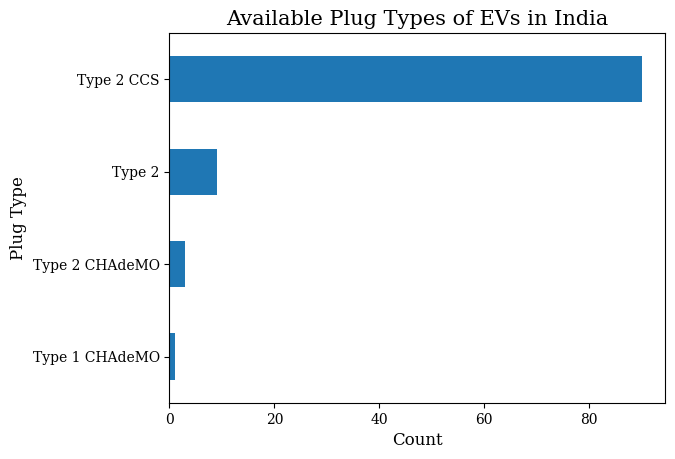

In [ ]:

# plug types visualization from dataset 2
df2['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()


#Analysis of Price of Different Models


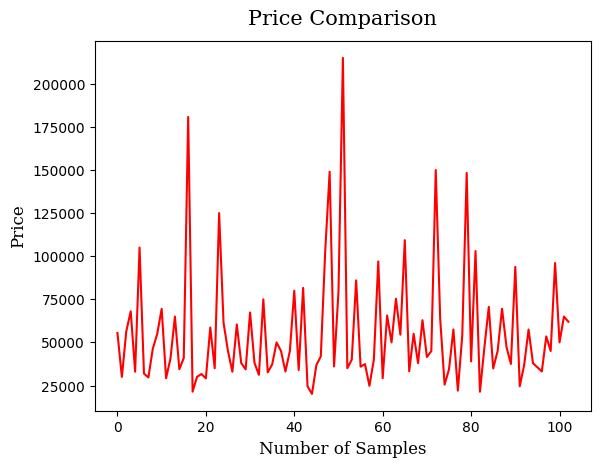

In [ ]:

# plotting the price from dataset 2
plt.plot(df2['PriceEuro'], color='red')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);


#Analysis of EVs based on accleration
**Observation: Based on accleration, EVs from Renault, Seat and Smart are the top performers while Tesla, Lucid and Porsche dont make it to the same.**

<ipython-input-56-f286c53a7a32>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2, y='Brand', x='AccelSec', ci=None, palette='viridis')
<ipython-input-56-f286c53a7a32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, y='Brand', x='AccelSec', ci=None, palette='viridis')


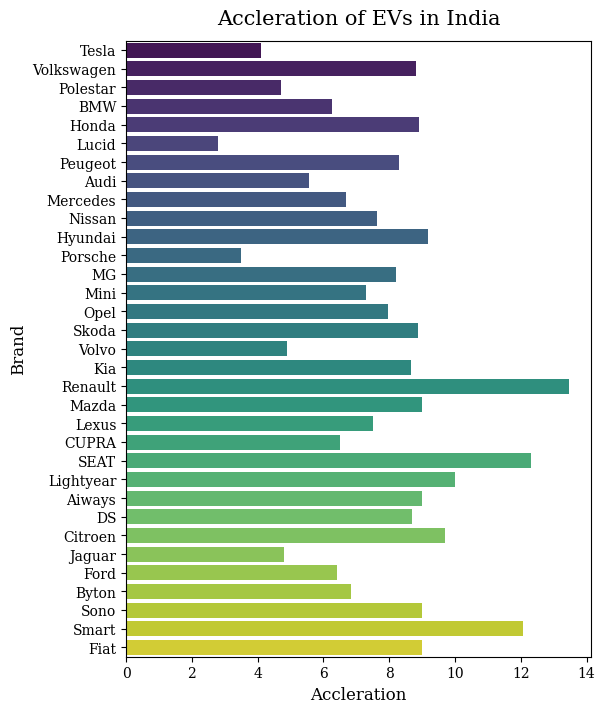

In [ ]:

# accleration visualization from dataset 2
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, y='Brand', x='AccelSec', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

#Analysis of EVs based on speed
**Observation: Based on speed parameter, EVs from Tesla, Lucid and Porsche are the top performers while Renault, Smart and SEAT dont make it to the same.**

<ipython-input-57-d8d0ac5f2f91>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2, x='TopSpeed_KmH', y='Brand', ci=None, palette='viridis')
<ipython-input-57-d8d0ac5f2f91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='TopSpeed_KmH', y='Brand', ci=None, palette='viridis')


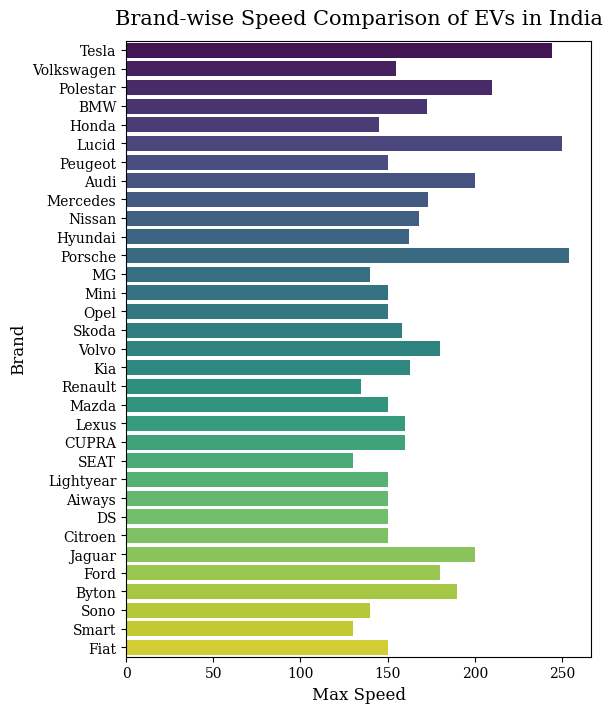

In [ ]:

# speed visualization from dataset 2
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, x='TopSpeed_KmH', y='Brand', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()

# Correaltion Matrix Using Dataset 2

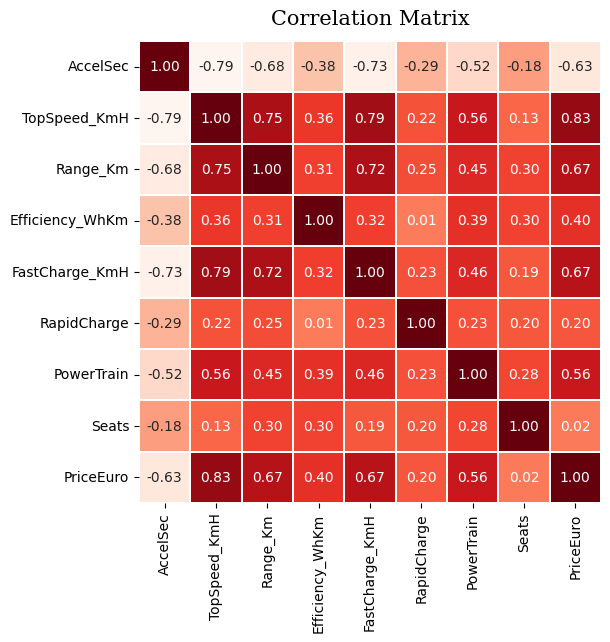

In [ ]:
# Handle non-numerical columns before calculating correlation
df2_numeric = df2.select_dtypes(include=['number'])  # Select only numerical columns

# plotting the correlation matrix from dataset 3
plt.figure(figsize=(6,6))
sns.heatmap(data=df2_numeric.corr(), annot=True, cmap='Reds',
            cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

#Analysis of EVs based on the range parameter
**Observation: Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.**

<ipython-input-59-6e2fd448bfd7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', data=df2, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)
<ipython-input-59-6e2fd448bfd7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df2, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)


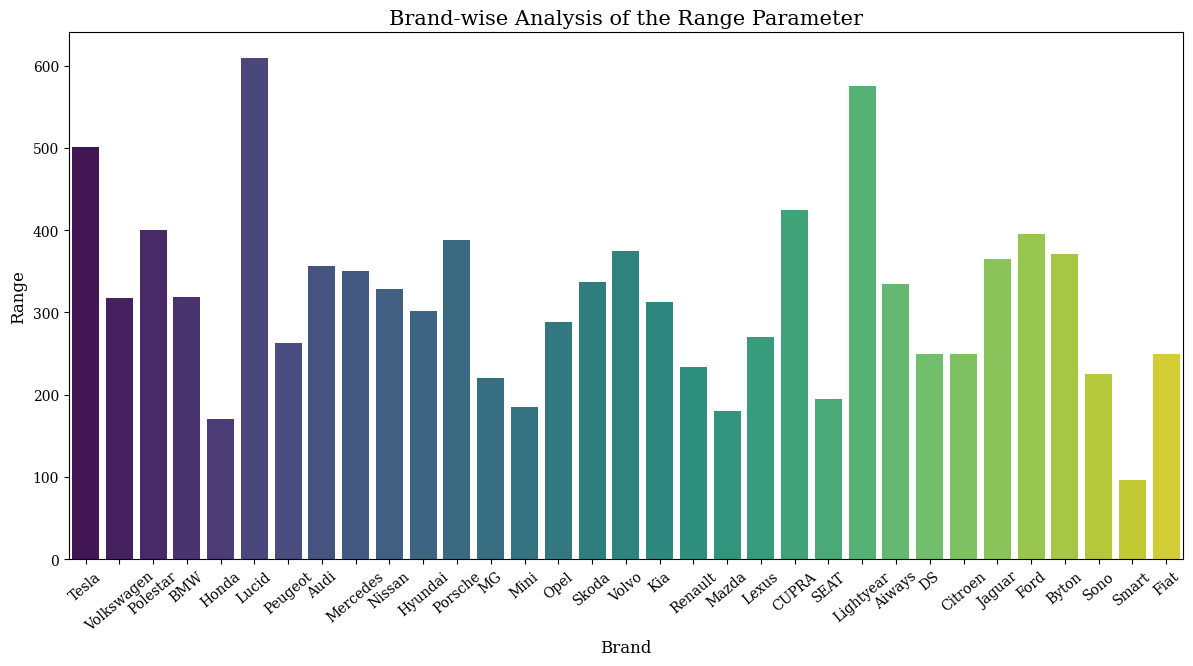

In [ ]:

# brand-wise analysis of the range parameter
sns.catplot(kind='bar', data=df2, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15);

# **Model Building Using K-Means Clusteing**

In [ ]:

# encoding the categorical features

# PowerTrain feature
df2['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df2['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)


In [ ]:

# selecting features for building a model
X = df2[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [ ]:

# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

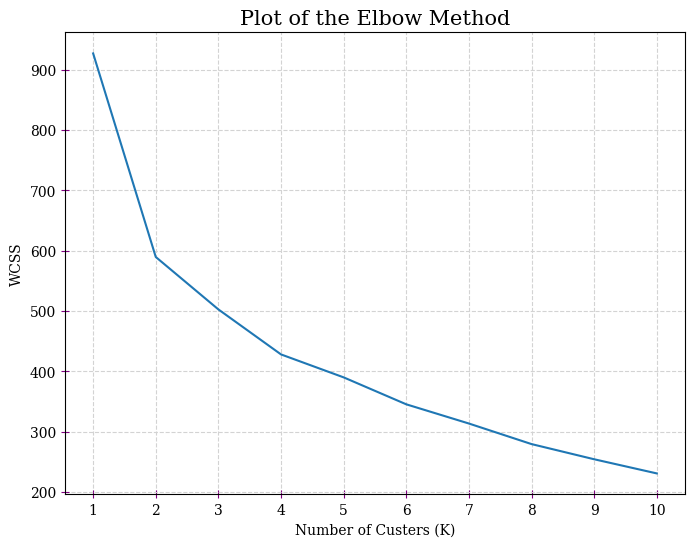

In [ ]:

# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [ ]:

# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=90)

In [ ]:

# check the labels assigned to each data point
print(kmean.labels_)

[3 0 2 1 1 3 0 0 1 2 2 1 1 2 0 1 3 1 0 1 1 2 1 3 3 1 1 2 0 0 2 1 1 2 1 1 1
 0 0 2 3 1 2 1 1 1 1 3 3 0 2 3 1 1 2 1 1 0 1 3 0 2 2 2 0 3 1 2 0 2 1 2 3 2
 1 1 2 0 2 3 1 2 0 1 2 1 2 2 2 1 2 0 0 2 1 1 1 0 1 2 2 2 2]


In [ ]:

pd.Series(kmean.labels_).value_counts()


,count
1,39
2,32
0,19
3,13


In [ ]:
df2['clusters'] = kmean.labels_

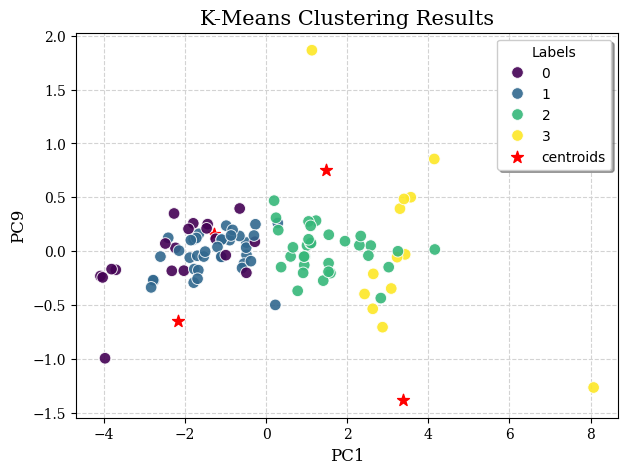

In [ ]:

# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()